
------

# **Lung Cancer Detection**

-----



In [1]:
# Create a directory called '.kaggle' in the home directory if it doesn't already exist
!mkdir -p ~/.kaggle

In [2]:
# Copy the 'kaggle.json' file to the newly created '.kaggle' directory
!cp kaggle.json ~/.kaggle/

In [4]:
!pip install kaggle -q

In [5]:
# Use the Kaggle API to download the dataset titled 'labeled-chest-xray-images'
# from the user 'tolgadincer'
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
 99% 1.17G/1.17G [00:14<00:00, 35.3MB/s]
100% 1.17G/1.17G [00:14<00:00, 89.0MB/s]


In [6]:
# List the contents of the '/content' directory
!ls /content

kaggle.json  labeled-chest-xray-images.zip  sample_data


In [7]:
import zipfile  # Import the zipfile module to work with ZIP files

# Create a ZipFile object to read the specified ZIP file
zip_ref = zipfile.ZipFile('/content/labeled-chest-xray-images.zip', 'r')

# Extract all the contents of the ZIP file to the '/content' directory
zip_ref.extractall('/content')

# Close the ZipFile object to free up system resources
zip_ref.close()

In [8]:
import tensorflow  # Import the TensorFlow library, a popular framework for machine learning

# Import the Keras API from TensorFlow for building and training models
from tensorflow import keras

# Import the Sequential model type for creating a linear stack of layers
from keras import Sequential

# Import necessary layers for the model
from keras.layers import Dense, Flatten, Dropout

# Import the VGG16 model architecture pre-trained on ImageNet
from keras.applications.vgg16 import VGG16

In [9]:
# Create a convolutional base using the VGG16 model
conv_base = VGG16(
    weights='imagenet',          # Use pre-trained weights from the ImageNet dataset
    include_top=False,          # Exclude the fully connected layers at the top of the model
    input_shape=(150, 150, 3)   # Specify the input shape for the model (height, width, channels)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Set the entire convolutional base to be trainable
conv_base.trainable = True

# Initialize a flag to control which layers will be trainable
set_trainable = False

# Iterate through each layer in the convolutional base
for layer in conv_base.layers:
    # Start setting layers to be trainable from 'block5_conv1' onwards
    if layer.name == 'block5_conv1':
        set_trainable = True
    # Set the current layer's trainable property based on the flag
    if set_trainable:
        layer.trainable = True  # Make the layer trainable
    else:
        layer.trainable = False  # Keep the layer non-trainable

# Print the name and trainable status of each layer in the convolutional base
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [11]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [13]:
from tensorflow.keras import regularizers  # Import regularizers from Keras for weight regularization

# Create a new Sequential model
model = Sequential()

# Add the convolutional base (VGG16) to the model
model.add(conv_base)

# Flatten the output of the convolutional base to feed into the dense layers
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
# Apply L2 regularization to help prevent overfitting
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add a Dropout layer to reduce overfitting by randomly setting 10% of input units to 0
model.add(Dropout(0.1))

# Add another fully connected layer with 128 units and ReLU activation
# Apply L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add another Dropout layer
model.add(Dropout(0.1))

# Add a fully connected layer with 64 units and ReLU activation
# Apply L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add another Dropout layer
model.add(Dropout(0.1))

# Add a fully connected layer with 32 units and ReLU activation
# Apply L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add another Dropout layer
model.add(Dropout(0.1))

# Add the output layer with a single unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Create a training dataset generator from images in the specified directory
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/train',  # Path to the training images
    labels='inferred',                       # Automatically infer labels from directory structure
    label_mode='int',                        # Use integer labels (0, 1) for classification
    batch_size=32,                           # Number of images to include in each batch
    image_size=(150, 150)                    # Resize all images to 150x150 pixels
)

# Create a validation dataset generator from images in the specified directory
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/test',   # Path to the testing images
    labels='inferred',                       # Automatically infer labels from directory structure
    label_mode='int',                        # Use integer labels (0, 1) for classification
    batch_size=32,                           # Number of images to include in each batch
    image_size=(150, 150)                    # Resize all images to 150x150 pixels
)

Found 5232 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [15]:
# Define a function to process the images and labels
def process(image, label):
    # Normalize the image pixel values to the range [0, 1]
    image = tensorflow.cast(image / 255.0, tensorflow.float32)
    return image, label  # Return the processed image and the original label

# Apply the processing function to the training dataset
train_ds = train_ds.map(process)

# Apply the processing function to the validation dataset
validation_ds = validation_ds.map(process)

In [16]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # Use RMSprop optimizer with a small learning rate (1e-5)
    loss='binary_crossentropy',  # Specify binary crossentropy loss function for binary classification
    metrics=['accuracy']         # Track accuracy as an evaluation metric during training and testing
)

In [17]:
# Train the model using the training dataset and validate it with the validation dataset
history = model.fit(
    train_ds,                # Training dataset
    epochs=50,               # Number of epochs to train the model
    validation_data=validation_ds  # Validation dataset for evaluating the model's performance
)

Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 74s 357ms/step - accuracy: 0.8456 - loss: 8.1617 - val_accuracy: 0.8109 - val_loss: 7.8150
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 277ms/step - accuracy: 0.9627 - loss: 7.3393 - val_accuracy: 0.8782 - val_loss: 7.1956
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 46s 281ms/step - accuracy: 0.9682 - loss: 6.8232 - val_accuracy: 0.8253 - val_loss: 6.9505
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 80s 271ms/step - accuracy: 0.9781 - loss: 6.3409 - val_accuracy: 0.8878 - val_loss: 6.2837
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 288ms/step - accuracy: 0.9822 - loss: 5.9082 - val_accuracy: 0.9199 - val_loss: 5.8160
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 254ms/step - accuracy: 0.9848 - loss: 5.5126 - val_accuracy: 0.9247 - val_loss: 5.4613
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.9855 - loss: 5.1521 - val_accuracy: 0.8734 - val_loss: 5.3093
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 262ms/step - accuracy: 0.9872 - loss: 4

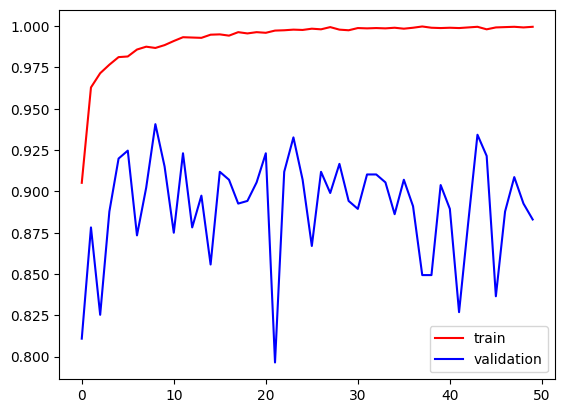

In [18]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Plot the training accuracy over the epochs
plt.plot(history.history['accuracy'], color='red', label='train')  # Training accuracy in red
# Plot the validation accuracy over the epochs
plt.plot(history.history['val_accuracy'], color='blue', label='validation')  # Validation accuracy in blue

# Add a legend to the plot to differentiate between training and validation accuracy
plt.legend()

# Display the plot
plt.show()

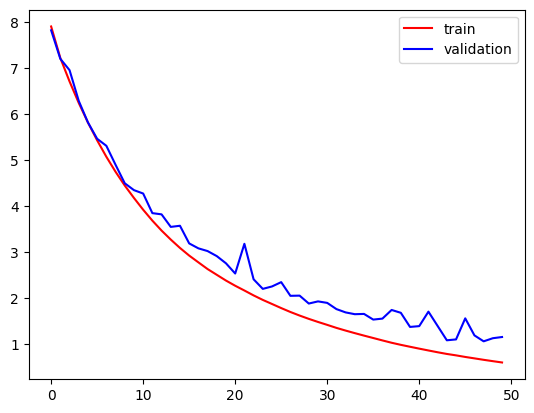

In [19]:
# Plot the training loss over the epochs
plt.plot(history.history['loss'], color='red', label='train')  # Training loss in red
# Plot the validation loss over the epochs
plt.plot(history.history['val_loss'], color='blue', label='validation')  # Validation loss in blue

# Add a legend to the plot to differentiate between training and validation loss
plt.legend()

# Display the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


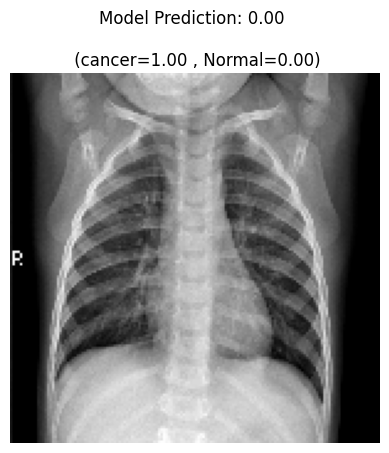

In [31]:
import cv2  # Import OpenCV for image processing

# Read the test image from the specified file path
# Make sure the file path is correct and the image exists
test_img = cv2.imread('/content/chest_xray/train/NORMAL/NORMAL-1029510-0001.jpeg')

# Check if the image was loaded successfully
if test_img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert the image from BGR (OpenCV default) to RGB format
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size for the model
    test_img_resized = cv2.resize(test_img_rgb, (150, 150))

    # Reshape the image to add a batch dimension (1, 150, 150, 3)
    test_input = test_img_resized.reshape((1, 150, 150, 3))

    # Use the model to predict the class of the test image
    prediction = model.predict(test_input)

    # Display the resized image with the model's prediction as the title
    plt.imshow(test_img_resized)
    plt.title(f"Model Prediction: {prediction[0][0]:.2f} \n\n (cancer=1.00 , Normal=0.00)")
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the image with prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


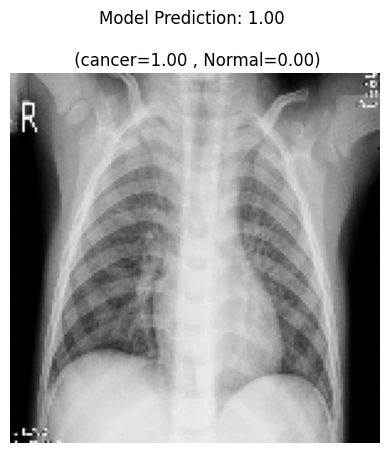

In [29]:
import cv2  # Import OpenCV for image processing

# Read the test image from the specified file path
# Make sure the file path is correct and the image exists
test_img = cv2.imread('/content/chest_xray/train/PNEUMONIA/BACTERIA-1039608-0001.jpeg')

# Check if the image was loaded successfully
if test_img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert the image from BGR (OpenCV default) to RGB format
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size for the model
    test_img_resized = cv2.resize(test_img_rgb, (150, 150))

    # Reshape the image to add a batch dimension (1, 150, 150, 3)
    test_input = test_img_resized.reshape((1, 150, 150, 3))

    # Use the model to predict the class of the test image
    prediction = model.predict(test_input)

    # Display the resized image with the model's prediction as the title
    plt.imshow(test_img_resized)
    plt.title(f"Model Prediction: {prediction[0][0]:.2f} \n\n (cancer=1.00 , Normal=0.00)")
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the image with prediction

In [32]:
# Import the drive module from Google Colab to enable access to Google Drive
from google.colab import drive

# Mount Google Drive to the Colab environment at the specified path ('/content/gdrive')
# This allows you to read and write files to your Google Drive directly from Colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
# prompt: export the model for prediction

model.save('/content/gdrive/MyDrive/Lung Cancer Detection/lung_cancer_model.h5')

------